# Master 2 High Performance Computing and Simulation

## Members : lougani faouzi ,hery Andrianantenaina

## Report of module Data & Apprentissage TD1

## Exercice 01


a)Implementation from scratch of our version of the RANSAC algorithm.

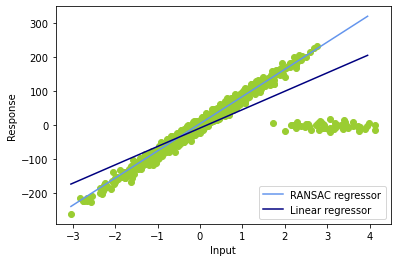

In [11]:
from sklearn import datasets
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

def ransac_version(X, y, N, taille, seuil, nb_inliners, reg):
   
    meilleur_ensemble = None
    meilleur_erreur = None
    iterator = 0
    cpt_erreur= 0   
    
    while iterator < N:
    
        # Define the sample of random points and fit model to this sample
        points_aleatoires = np.random.choice(X.shape[0],taille,replace=False)
        x_alea = X[points_aleatoires]
        y_alea = y[points_aleatoires]
        modele_possible = reg.fit(x_alea,y_alea)
        #Construction of the set of points
        points_restant = np.delete(np.arange(X.shape[0]),points_aleatoires)
        #The rest of the points of our dataset
        x_reste= X[points_restant]
        y_reste= y[points_restant]
        y_predit = modele_possible.predict(X)
        v = [prediction-label for (prediction,label) in tuple(zip(y_predit, y_reste))]
        ensemble_points = x_reste[v < seuil]
        inliners_l = y_reste[v < seuil]
        #the cardinality of the set of poits is greater than nb_inliners deduce a new model 
        if len(ensemble_points) > nb_inliners:
            meilleur_x = np.concatenate((x_alea,ensemble_points))
            meilleur_y = np.concatenate((y_alea,inliners_l))
            meilleur_modele = reg.fit(meilleur_x, meilleur_y)
            pred_better = meilleur_modele.predict(meilleur_x)                 
            # Keep the best model if its error is lower than the one already calculated 
            cpt_erreur = mean_squared_error(pred_better,meilleur_y)
            if  meilleur_erreur == None :
                meilleur_erreur = cpt_erreur
                meilleur_ensemble = meilleur_modele
            if  cpt_erreur < meilleur_erreur:
                meilleur_ensemble = meilleur_modele
                meilleur_erreur = cpt_erreur
                
        iterator = iterator + 1
    
    return meilleur_ensemble


#Part of code  taken from Lab 2
N_samples = 1000
N_outliers = 50
X,y,coef = datasets.make_regression(n_samples=N_samples, n_features=1,n_informative=1, noise=10,coef=True, random_state=0)
np.random.seed(0)
X[:N_outliers] = 3 + 0.5 * np.random.normal(size=(N_outliers,1))
y[:N_outliers] = -3 + 10 * np.random.normal(size=N_outliers)


#ransac_version take :
#the data points X,
#the labels y, 
#number of iteration N, 
#the simple size taille,  
#number of inliners nb_inliners.
reg = linear_model.LinearRegression()
ransac_model = ransac_version(X,y,350,X.shape[1]+1,stats.median_abs_deviation(X),X.shape[0]/2,reg)
line_X = np.arange(X.min(),X.max())[:,np.newaxis]
line_y_ransac = ransac_model.predict(line_X)
plt.scatter(X, y, color="yellowgreen")
plt.plot(line_X, line_y_ransac, color="cornflowerblue", label="RANSAC regressor")

#Linear regression, to do comparaison with RANSAC
lin_reg_model = reg.fit(X,y)
line_y_reg = lin_reg_model.predict(line_X)
plt.plot(line_X, line_y_reg, color="navy", label="Linear regressor")

plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()



Comparaison : the figure shows that outliers have effect on linear regression,but not on our Ransac regression. as result Ransac however fits very well.

b) Apply our method to the following cases:
* Using only the part of the inline data that comes from the inclined linear model (about 1000 points). Adding extra 𝑝% of noisy points (where 𝑝 can be 5%, 10%, 20%, 30%) by picking random elements of the data and perturb them "sufficiently" with a Gaussian noise so that they get located far from the rest of the data on both sides.

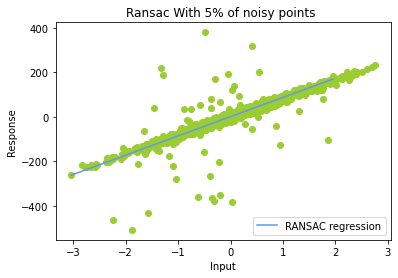

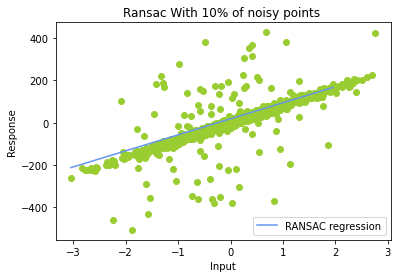

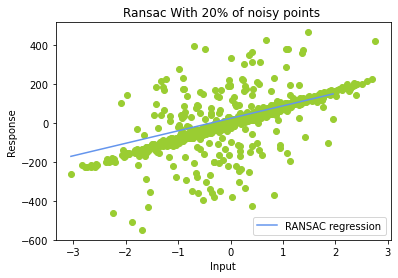

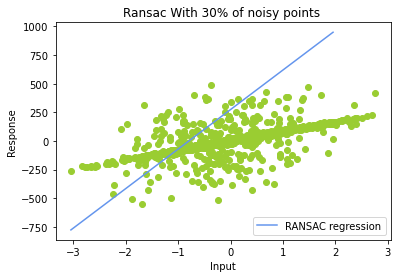

In [8]:
# case 5%
#define number of samples
N_samples = 1000
temp=N_samples * (5/100)
#cast temp to get nb outiliers 
N_outliers = int(temp)
X, y, coef = datasets.make_regression(n_samples=N_samples, n_features=1,n_informative=1, noise=10,coef=True, random_state=0)
# Add outlier data
np.random.seed(0)
point_outlier= np.random.choice(X.shape[0],N_outliers,replace=False)
y[point_outlier]= y[point_outlier] + 10 * np.random.normal(0,scale,N_outliers)
# Predict data of ransac model
ransac_model = ransac_version(X,y,300,X.shape[1]+1,stats.median_abs_deviation(X),X.shape[0]/2,reg)
line_X = np.arange(X.min(),X.max())[:,np.newaxis]
line_y = ransac_model.predict(line_X)
#plot results
plt.figure(1)
plt.title("Ransac With 5% of noisy points ")
plt.scatter(X, y, color="yellowgreen")
plt.plot(line_X, line_y, color="cornflowerblue", label="RANSAC regression")
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")


#case 10%
#define number of samples
N_samples = 1000
temp=N_samples * (10/100)
#cast temp to get nb outiliers 
N_outliers = int(temp)
X, y, coef = datasets.make_regression(n_samples=N_samples, n_features=1,n_informative=1, noise=10,coef=True, random_state=0)
# Add outlier data
np.random.seed(0)
point_outlier= np.random.choice(X.shape[0],N_outliers,replace=False)
y[point_outlier]= y[point_outlier] + 10 * np.random.normal(0,scale,N_outliers)
# Predict data of ransac model
ransac_model = ransac_version(X,y,300,X.shape[1]+1,stats.median_abs_deviation(X),X.shape[0]/2,reg)
line_X = np.arange(X.min(),X.max())[:,np.newaxis]
line_y = ransac_model.predict(line_X)
#plot results
plt.figure(2)
plt.title("Ransac With 10% of noisy points ")
plt.scatter(X, y, color="yellowgreen")
plt.plot(line_X, line_y, color="cornflowerblue", label="RANSAC regression")
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")


#case 20%
#define number of samples
N_samples = 1000
temp=N_samples * (20/100)
#cast temp to get nb outiliers 
N_outliers = int(temp)
X, y, coef = datasets.make_regression(n_samples=N_samples, n_features=1,n_informative=1, noise=10,coef=True, random_state=0)
# Add outlier data
np.random.seed(0)
point_outlier= np.random.choice(X.shape[0],N_outliers,replace=False)
y[point_outlier]= y[point_outlier] + 10 * np.random.normal(0,scale,N_outliers)
# Predict data of ransac model
ransac_model = ransac_version(X,y,300,X.shape[1]+1,stats.median_abs_deviation(X),X.shape[0]/2,reg)
line_X = np.arange(X.min(),X.max())[:,np.newaxis]
line_y = ransac_model.predict(line_X)
#plot results
plt.figure(3)
plt.title("Ransac With 20% of noisy points ")
plt.scatter(X, y, color="yellowgreen")
plt.plot(line_X, line_y, color="cornflowerblue", label="RANSAC regression")
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")

#case30

#define number of samples
N_samples = 1000
temp=N_samples * (30/100)
#cast temp to get nb outiliers 
N_outliers = int(temp)
X, y, coef = datasets.make_regression(n_samples=N_samples, n_features=1,n_informative=1, noise=10,coef=True, random_state=0)
# Add outlier data
np.random.seed(0)
point_outlier= np.random.choice(X.shape[0],N_outliers,replace=False)
y[point_outlier]= y[point_outlier] + 10 * np.random.normal(0,scale,N_outliers)
# Predict data of ransac model
ransac_model = ransac_version(X,y,300,X.shape[1]+1,stats.median_abs_deviation(X),X.shape[0]/2,reg)
line_X = np.arange(X.min(),X.max())[:,np.newaxis]
line_y = ransac_model.predict(line_X)
#plot results
plt.figure(4)
plt.title("Ransac With 30% of noisy points ")
plt.scatter(X, y, color="yellowgreen")
plt.plot(line_X, line_y, color="cornflowerblue", label="RANSAC regression")
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")

plt.show()


By analysing figures we can deduce that If the percentage of noisy points is low (p% betwen 5% and 10% for example) it is more likely to have sample without outliers but if we increase more points ,This perturbation with a Gaussian noise affect our ransac especially from p=30% .

* Do as in the previous but the perturbation to be only positive (all noisy points will be above the inline data.

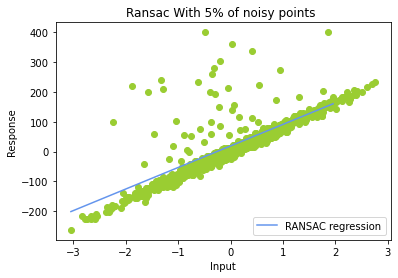

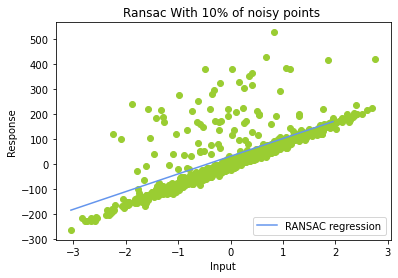

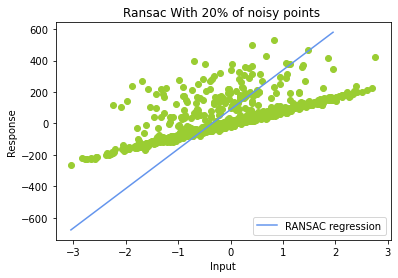

In [14]:
# case 5%
#define number of samples
N_samples = 1000
temp=N_samples * (5/100)
#cast temp to get nb outiliers 
N_outliers = int(temp)
X, y, coef = datasets.make_regression(n_samples=N_samples, n_features=1,n_informative=1, noise=10,coef=True, random_state=0)
# Add outlier data
np.random.seed(0)
point_outlier= np.random.choice(X.shape[0],N_outliers,replace=False)
y[point_outlier]= y[point_outlier] + 10 * np.absolute(np.random.normal(2,20,N_outliers))
# Predict data of ransac model
ransac_model = ransac_version(X,y,300,X.shape[1]+1,stats.median_abs_deviation(X),X.shape[0]/2,reg)
line_X = np.arange(X.min(),X.max())[:,np.newaxis]
line_y = ransac_model.predict(line_X)
#plot results
plt.figure(1)
plt.title("Ransac With 5% of noisy points ")
plt.scatter(X, y, color="yellowgreen")
plt.plot(line_X, line_y, color="cornflowerblue", label="RANSAC regression")
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")

#case 10%
#define number of samples
N_samples = 1000
temp=N_samples * (10/100)
#cast temp to get nb outiliers 
N_outliers = int(temp)
X, y, coef = datasets.make_regression(n_samples=N_samples, n_features=1,n_informative=1, noise=10,coef=True, random_state=0)
# Add outlier data
np.random.seed(0)
point_outlier= np.random.choice(X.shape[0],N_outliers,replace=False)
y[point_outlier]= y[point_outlier] + 10 * np.absolute(np.random.normal(0,20,N_outliers))
# Predict data of ransac model
ransac_model = ransac_version(X,y,300,X.shape[1]+1,stats.median_abs_deviation(X),X.shape[0]/2,reg)
line_X = np.arange(X.min(),X.max())[:,np.newaxis]
line_y = ransac_model.predict(line_X)
#plot results
plt.figure(2)
plt.title("Ransac With 10% of noisy points ")
plt.scatter(X, y, color="yellowgreen")
plt.plot(line_X, line_y, color="cornflowerblue", label="RANSAC regression")
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")


#case 20%
#define number of samples
N_samples = 1000
temp=N_samples * (20/100)
#cast temp to get nb outiliers 
N_outliers = int(temp)
X, y, coef = datasets.make_regression(n_samples=N_samples, n_features=1,n_informative=1, noise=10,coef=True, random_state=0)
# Add outlier data
np.random.seed(0)
point_outlier= np.random.choice(X.shape[0],N_outliers,replace=False)
y[point_outlier]= y[point_outlier] + 10 * np.absolute(np.random.normal(0,20,N_outliers))
# Predict data of ransac model
ransac_model = ransac_version(X,y,300,X.shape[1]+1,stats.median_abs_deviation(X),X.shape[0]/2,reg)
line_X = np.arange(X.min(),X.max())[:,np.newaxis]
line_y = ransac_model.predict(line_X)
#plot results
plt.figure(3)
plt.title("Ransac With 20% of noisy points ")
plt.scatter(X, y, color="yellowgreen")
plt.plot(line_X, line_y, color="cornflowerblue", label="RANSAC regression")
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")

plt.show()


here we see the impact quickly (with 20% of noisy points)unlike the previous case (with 30% of noisy points),we deduce that even positive noise affect our ransac. 

## Exercice 02

a) How we can design a solution to the problem of robust estimate of the center of a data point cloud that adopts 
the RANSAC principle.

1. Define NB as the number of times we will redo steps 2,3,4,5,6
2. Calculate the error R which will be half of the greatest distance between two points of the set.
3. Define N_C the number of points that we accept to consider a point as a center
4. Choose a random point in the data set.
5. Calculate the distance between this random point and the others. If the distance < N_C, add it to the cloud of the chosen center
6. If the number of points associated with the chosen center > N_C, this point will be the center ,then the new center will replace the old center defined in a previous iteration if its cloud is greater.
7. Repeat NB steps, then return to the last iteration where the center is found.



b) Extend this approach to the clustering of the data in a given number of 𝑘 clusters by considering an existing clustering method, such as 𝑘-means, as the internal model learner).

1. We take a clustering method based on the centre like k-means as a learner of the internal model.
2. To have a first model,We use the k-means algorithm to take random k-center to calculate the distance of each point to the centers and according to this distance then calculate the error of each cluster and stock them, for this we apply the steps defines in question a) to calculate the centers of each cluster.
3. We choose k new centers randomly and we repeat the last process (2) then we compare the error of each new center and to the old and we change the very distant centers to deduce a new model.
4. The model with clusters having the best error according to a given number of iteration K will be in the last iteration. 




c) Could you imagine other applications?

* Recognition of objects is one of the RANSAC applications.


d) Abstract pseudocode that expresses the generalization of RANSAC in arbitrary learning problems

* Select N (the number of samples)randomly. 
* we estimates a model hypothesis for each sample.
* find the number of inliers for each hypothesis.
* we chose the hypothesis with largest number of inliners as a model and use them to affect model parameters.
* The inlier is chosen as a point that his residual R is in some threshold T of the hypothesis.
* We can deduce the correct hypothesis because our N samples contain at least one sample  which consists of only true correspondences.





## Exercice 03

Cross validation :
it is a technique used to see how well will the model fit to unknown data, based on deviding the set of data that we have into multiple sets, that we will use either to train the model or to test it

Using this technique for time series involve taking into account new data generated as time goes. This can make a problem because observations from the training set must occur before their corresponding test set =>temporal dependency between observations, and that every test set contains unique observations =>good choice of test set

Here we start with a small subset of data for training purpose, forecast for the later data points and then checking the accuracy for the forecasted data points. The same forecasted data points are then included as part of the next training dataset and subsequent data points are forecasted,As the following example explains:

* We do training 1 then the test 2
* We do training 1 and 2 then the test 3
* We do training 1,2,3 then test 4


Pseudocode that would apply (i) and (ii) will be like:



## Exercice 04

a) multi-class SVM with the <1 class-vs-all classes> architecture, where 𝑘 classifiers as many as the classes, and each one of them will be trained to distinguish the objects of one class against any other class.
c)Make a simple demonstration on Iris dataset

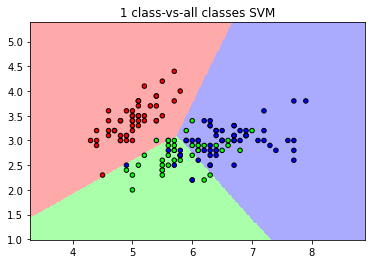

In [13]:
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

 

#load iris data by Taking the first two features using 2D dataset
iris_data = datasets.load_iris()
X = iris_data.data[:, :2]
Y = iris_data.target


# split traning and test sets, 
X_train, X_test, y_train, y_test = \
train_test_split(X, Y, stratify=Y, test_size=0.7)
    
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#begin to learn predict each class against the other
# Create an SVM instance and fit out data. here to plot the support vectors we will not scale our data .
clf = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
#predicting the label k for which the corresponding classifier reports the highest confidence score 
y_score = clf.fit(X_train, y_train).decision_function(X_test)

#Plot the decision boundary. 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# step size in the mesh
h = .02 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold,edgecolor='k', s=20)
plt.title(" 1 class-vs-all classes SVM ")
plt.show()

b) multi-class SVM with <*1 class-vs-1 class*> architecture, where we will need $\frac{1}{2}(k-1)^2$ classifiers, each one of them deciding among two classes only.c)Make a simple demonstration on Iris dataset  

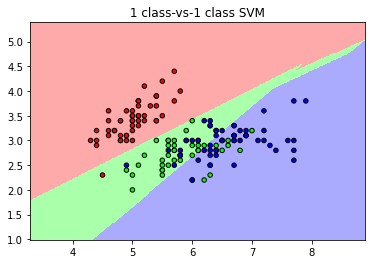

In [12]:
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#load iris data by Taking the first two features using 2D dataset
iris_data = datasets.load_iris()
X = iris_data.data[:, :2]
y = iris_data.target

#This is implemented as ``argmax(decision_function(X), axis=1)`` which will return the label of the class with most votes by estimators predicting the outcome of a decision for each possible class pair.


# shuffle and split training and test sets
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, stratify=y, test_size=0.7)

#begin to learn predict each class against the other
# Create an SVM instance and fit out data. here to plot the support vectors we will not scale our data .
clf = OneVsOneClassifier(LinearSVC(max_iter=1000000, random_state=0))
y_score = clf.fit(X_train, y_train).decision_function(X_test)

#Plot the decision boundary. 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# step size in the mesh
h = .02 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,edgecolor='k', s=20)
plt.title(" 1 class-vs-1 class SVM ")

plt.show()
